## Урок 2

### Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

#### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 99)

In [2]:
X = np.hstack([np.ones((X.shape[0], 1)), X])
X

array([[ 1.        ,  0.85629056,  0.12976105],
       [ 1.        , -0.34341604,  1.64476311],
       [ 1.        , -0.17807995, -0.25690271],
       ...,
       [ 1.        , -0.79994579, -0.91716748],
       [ 1.        ,  0.35632822,  0.03023829],
       [ 1.        ,  0.08159206, -0.22095116]])

In [3]:
X.shape

(10000, 3)

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
list_classic_err = []
def classic_gd_model(X, y, iterations, alpha = 1e-2):
    n = X.shape[0]
    W = np.random.randn(X.T.shape[0])

    for ii in range(iterations + 1):  
        y_pred = np.dot(W, X.T)
        err = calc_mse(y, y_pred)
        list_classic_err.append(err)
        W -= (alpha * 1/n * 2 * (X.T @ (y_pred - y)))

        if ii % 25 == 0:
            print(ii, alpha,  W, err)

In [6]:
classic_gd_model(X, y, 250)

0 0.01 [-0.34908808  1.66401336  2.31472168] 10238.235103665718
25 0.01 [ 0.23062192 26.92196714 32.49285679] 3711.9162399810784
50 0.01 [ 0.39645042 41.99360915 50.71073347] 1356.4965630021347
75 0.01 [ 0.3860847  50.98740441 61.70922842] 506.085949208787
100 0.01 [ 0.31354061 56.35458034 68.34969644] 198.9362752612015
125 0.01 [ 0.2299701  59.55767272 72.35922978] 87.95927175853402
150 0.01 [ 0.15564872 61.46934875 74.78036174] 47.84694107784341
175 0.01 [ 0.096455   62.61033582 76.24244587] 33.34303206216077
200 0.01 [5.21210376e-02 6.32913704e+01 7.71254349e+01] 28.096713175335648
225 0.01 [2.01950203e-02 6.36978886e+01 7.76587294e+01] 26.19831716507849
250 0.01 [-2.17739129e-03  6.39405572e+01  7.79808418e+01] 25.511119948719582


In [7]:
list_stochastic_err = []

def stochastic_gd_model(X, y, iterations, qty_in_batch=1, alpha=1e-2):
    W = np.random.randn(X.T.shape[0])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for ii in range(1, iterations+1):
        for bb in range(n_batch):
            start_ = qty_in_batch*bb
            end_ = qty_in_batch*(bb+1)

            X_tmp = X.T[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            
            W -= (alpha * (1/n * 2 * np.dot(X_tmp, (y_pred_tmp - y_tmp))))

        if ii % (iterations / 10) == 0:
            print(ii, alpha, W, err)
            
        list_stochastic_err.append(err)      

In [8]:
stochastic_gd_model(X, y, iterations=250, qty_in_batch=1, alpha=1e-2)

25 0.01 [ 0.72685315 26.64993226 30.18831689] 12.263788315951363
50 0.01 [ 0.7021196  41.71264465 49.16810357] 0.26278046547517475
75 0.01 [ 0.57608832 50.74860739 60.68599885] 2.019365221482359
100 0.01 [ 0.43264541 56.16943591 67.67609252] 7.1110861904443725
125 0.01 [ 0.30520734 59.42163616 71.91858159] 12.014063568576896
150 0.01 [ 0.20350697 61.37287147 74.49363433] 15.821205988275285
175 0.01 [ 0.1270912  62.54361876 76.05670631] 18.523067124156782
200 0.01 [7.18498430e-02 6.32461056e+01 7.70055596e+01] 20.35289219985698
225 0.01 [3.29754425e-02 6.36676422e+01 7.75815910e+01] 21.55905961560647
250 0.01 [6.15535362e-03 6.39206038e+01 7.79313108e+01] 22.34098418665328


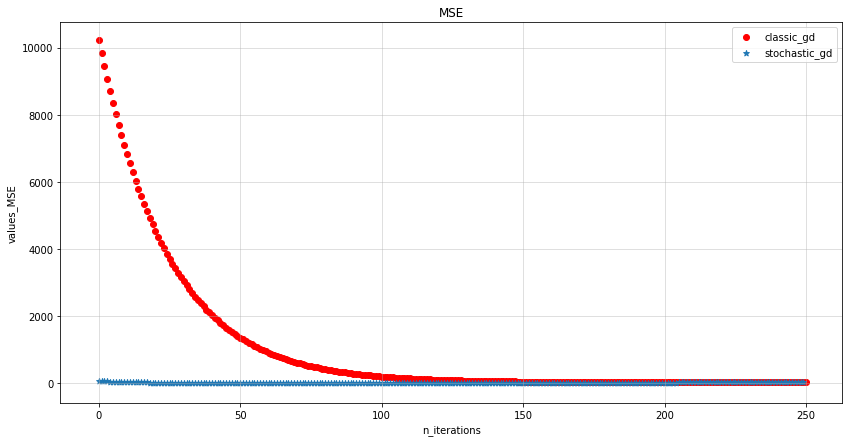

In [21]:
fig = plt.figure(figsize=(14, 7))
plt.title('MSE')
plt.scatter(range(len(list_classic_err)), list_classic_err, color='red')
plt.scatter(range(len(list_stochastic_err)), list_stochastic_err, marker='*')
plt.xlabel('n_iterations')
plt.ylabel('values_MSE')
plt.legend(('classic_gd', 'stochastic_gd'))
plt.grid(alpha=0.5)

Вывод: стохастический градиентный спуск сходится(SGD) более быстро и резко, чем классический градиентный спуск(Classic GD) при равных настройках. Однако в то же время при увеличении количества итераций и установлении статической скорости обучения SGD может ухудшать показатель ошибки и уходить от минимума(метод иммитации отжига в таком случае может снизить показатель ошибки при SGD).

#### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
list_classic_err_l2 = []
def classic_gd_model_l2(X, y, iterations, alpha=1e-2, lambda_=1e-4):
    n = X.shape[0]
    W = np.random.randn(X.T.shape[0])

    for ii in range(iterations + 1):  
        y_pred = np.dot(W, X.T)
        err = calc_mse(y, y_pred)
        list_classic_err_l2.append(err)
        
        W -= alpha * (1/n * 2 * (X.T @ (y_pred - y)) + 2 * lambda_ * W)
 
        if ii % 25 == 0:
            print(ii, alpha,  W, err)

In [11]:
classic_gd_model_l2(X, y, iterations=250)

0 0.01 [-0.98248674  1.52541484 -0.55513908] 10722.964110025625
25 0.01 [-0.14241333 26.84412453 30.75880126] 3887.771225511569
50 0.01 [ 0.17686508 41.94905121 49.66169635] 1420.4350762986048
75 0.01 [ 0.25690542 50.96093028 61.07334871] 529.4120089212079
100 0.01 [ 0.2376047  56.33783285 67.96301419] 207.49147019476607
125 0.01 [ 0.18537884 59.54609212 72.12285699] 91.12344732350043
150 0.01 [ 0.12950264 61.46046985 74.63465473] 49.0326884264211
175 0.01 [ 0.08115858 62.60284068 76.15142971] 33.796416512865044
200 0.01 [4.32036265e-02 6.32845642e+01 7.70674101e+01] 28.275308532583587
225 0.01 [1.50263483e-02 6.36914117e+01 7.76206067e+01] 26.27165939591916
250 0.01 [-5.14414270e-03  6.39342278e+01  7.79547255e+01] 25.542905510708998


In [12]:
list_stochastic_err_l2 = []

def stochastic_gd_model_l2(X, y, iterations, qty_in_batch=1, alpha=1e-2, lambda_=1e-4):
    W = np.random.randn(X.T.shape[0])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for ii in range(1, iterations+1):
        for bb in range(n_batch):
            start_ = qty_in_batch*bb
            end_ = qty_in_batch*(bb+1)

            X_tmp = X.T[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            
            W -= alpha * ((1/n * 2 * np.dot(X_tmp, (y_pred_tmp - y_tmp))) + 2 * lambda_ * W)

        if ii % (iterations / 10) == 0:
            print(ii, alpha, W, err)
            
        list_stochastic_err_l2.append(err)  

In [13]:
stochastic_gd_model_l2(X, y, iterations=250)

25 0.01 [-0.23839118 21.16256891 24.55432893] 11.114406147721253
50 0.01 [ 0.19066845 28.37559669 33.82149796] 5.307572667090678
75 0.01 [ 0.31594441 30.99897076 37.2317945 ] 3.570696821302197
100 0.01 [ 0.35011425 31.95313    38.4868563 ] 2.9733565870106786
125 0.01 [ 0.35832372 32.30018628 38.94877527] 2.751640918286186
150 0.01 [ 0.3597478  32.42642649 39.11879291] 2.6665768242358268
175 0.01 [ 0.35968752 32.47234785 39.18137493] 2.6335596248489437
200 0.01 [ 0.35945152 32.48905304 39.20441226] 2.620712367322282
225 0.01 [ 0.35928641 32.4951303  39.21289315] 2.615718560585505
250 0.01 [ 0.35919701 32.49734128 39.21601548] 2.6137817493599105


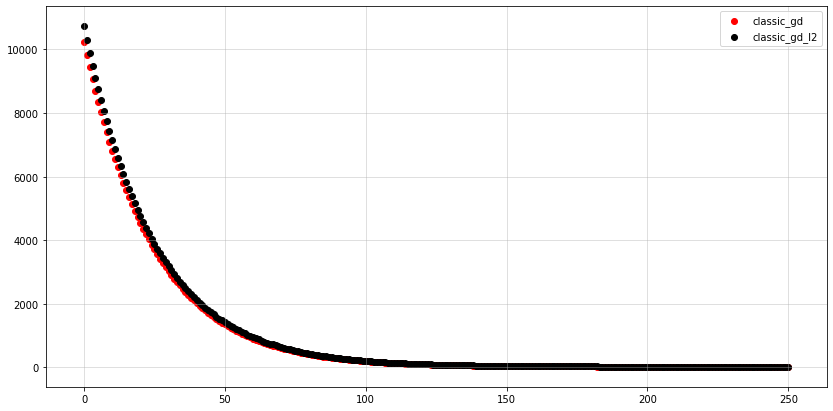

In [14]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(range(len(list_classic_err)), list_classic_err, color='red')
plt.scatter(range(len(list_classic_err_l2)), list_classic_err_l2, color='black')
plt.legend(('classic_gd', 'classic_gd_l2'))
# plt.ylim(-50, 1000000)
plt.grid(alpha=0.5)

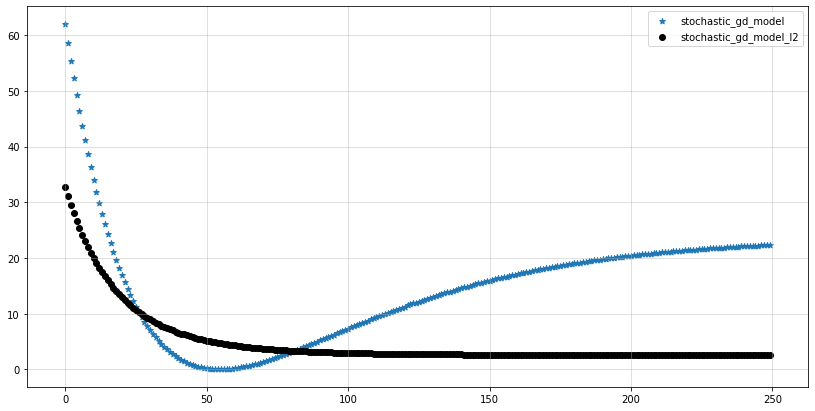

In [15]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(range(len(list_stochastic_err)), list_stochastic_err, marker='*')
plt.scatter(range(len(list_stochastic_err_l2)), list_stochastic_err_l2, color='black')
plt.legend(('stochastic_gd_model', 'stochastic_gd_model_l2'))
plt.grid(alpha=0.5)

#### 3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [16]:
list_stochastic_err_l1 = []

def stochastic_gd_model_l1(X, y, iterations, qty_in_batch=1, alpha=1e-2, lambda_=1e-4):
    W = np.random.randn(X.T.shape[0])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for ii in range(1, iterations+1):
        for bb in range(n_batch):
            start_ = qty_in_batch*bb
            end_ = qty_in_batch*(bb+1)
            X_tmp = X.T[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            
            W -= alpha * ((1/n * 2 * np.dot(X_tmp, (y_pred_tmp - y_tmp))) + lambda_ * np.abs(W))
        if ii % (iterations / 10) == 0:
            print(ii, alpha, W, err)
    
        list_stochastic_err_l1.append(err)  

In [17]:
stochastic_gd_model_l1(X, y, iterations=250)

25 0.01 [ 0.14852133 23.31563913 27.62449074] 10.355918210224901
50 0.01 [ 0.34593015 33.89693582 40.63726633] 1.9701669087998106
75 0.01 [ 0.37918162 38.84013833 46.78657913] 0.23184534983601823
100 0.01 [ 0.36669596 41.14952826 49.69268692] 0.00023519612553108421
125 0.01 [ 0.34754953 42.22848956 51.06617577] 0.048070714045946455
150 0.01 [ 0.33227885 42.7326103  51.71535802] 0.11345223144854732
175 0.01 [ 0.32213891 42.96816066 52.02221501] 0.15645837662828213
200 0.01 [ 0.31597348 43.07822682 52.16727013] 0.18044084863836754
225 0.01 [ 0.31241443 43.12966021 52.23584383] 0.19298209359590143
250 0.01 [ 0.31042921 43.15369598 52.26826356] 0.199348464241457


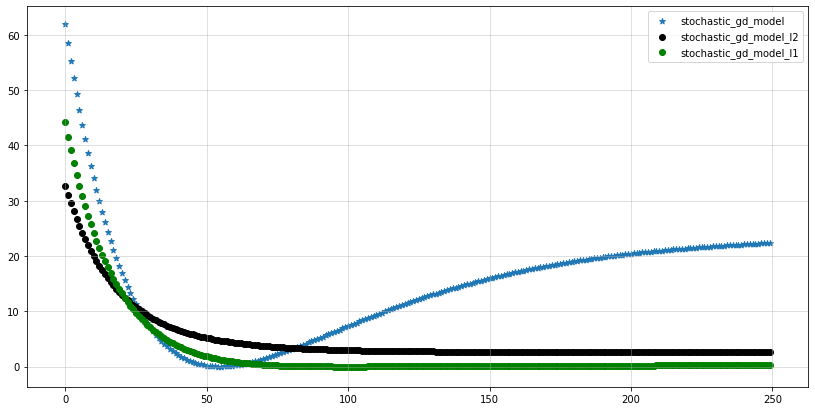

In [18]:
fig = plt.figure(figsize=(14, 7))
plt.scatter(range(len(list_stochastic_err)), list_stochastic_err, marker='*')
plt.scatter(range(len(list_stochastic_err_l2)), list_stochastic_err_l2, color='black')
plt.scatter(range(len(list_stochastic_err_l1)), list_stochastic_err_l1, color='green')
plt.legend(('stochastic_gd_model', 'stochastic_gd_model_l2', 'stochastic_gd_model_l1'))
plt.grid(alpha=0.5)